# Logistic Regression

L4 ~ L5a ML interview coding round.

In [1]:
import numpy as np

class LogisticRegression:
    
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # initialize weights and bias to zeros
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent optimization
        for i in range(self.n_iters):
            # calculate predicted probabilities and cost
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)
            cost = (-1 / n_samples) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            
            # calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        # calculate predicted probabilities
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        # convert probabilities to binary predictions
        return np.round(y_pred).astype(int)
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


## Test

In [2]:
# create sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression()

# train model on sample dataset
lr.fit(X, y)

# make predictions on new data
X_new = np.array([[6, 7], [7, 8]])
y_pred = lr.predict(X_new)

print(y_pred)  # [1, 1]

[1 1]


# Follow Up

Add regularization: Regularization can help prevent overfitting and improve the generalization performance of the model. You could add L1 or L2 regularization to the cost function and adjust the regularization strength with a hyperparameter. Here's an example of how to add L2 regularization to the code;

Use a more sophisticated optimization algorithm: Gradient descent is a simple and effective optimization algorithm, but it may not be the most efficient or accurate for large or complex datasets. You could try using a more sophisticated algorithm, such as stochastic gradient descent (SGD), mini-batch SGD, or Adam, which can converge faster and find better optima. Here's an example of how to use mini-batch SGD.

In [3]:
import numpy as np

class LogisticRegression:
    
    def __init__(self, learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=32):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.regularization = regularization
        self.reg_strength = reg_strength
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        n_batches = n_samples // self.batch_size
        for i in range(self.n_iters):
            batch_indices = np.random.choice(n_samples, self.batch_size)
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            z = np.dot(X_batch, self.weights) + self.bias
            y_pred = self._sigmoid(z)
            cost = (-1 / self.batch_size) * np.sum(y_batch * np.log(y_pred) + (1 - y_batch) * np.log(1 - y_pred))
            if self.regularization == 'l2':
                reg_cost = (self.reg_strength / (2 * n_samples)) * np.sum(self.weights ** 2)
                cost += reg_cost
            elif self.regularization == 'l1':
                reg_cost = (self.reg_strength / (2 * n_samples)) * np.sum(np.abs(self.weights))
                cost += reg_cost
            dw = (1 / self.batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
            db = (1 / self.batch_size) * np.sum(y_pred - y_batch)
            if self.regularization == 'l2':
                dw += (self.reg_strength / n_samples) * self.weights
            elif self.regularization == 'l1':
                dw += (self.reg_strength / n_samples) * np.sign(self.weights)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        return np.round(y_pred).astype(int)
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

Regularization: You can choose between L1 or L2 regularization by setting the regularization parameter to either 'l1' or 'l2', and adjust the regularization strength with the reg_strength parameter.

Mini-batch stochastic gradient descent: The model uses mini-batch SGD (instead of simple gradient descent) to update the weights and bias, which can converge faster and find better optima.

In [4]:
# create sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression(learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=2)

# train model on sample dataset
lr.fit(X, y)

# make predictions on new data
X_new = np.array([[6, 7], [7, 8]])
y_pred = lr.predict(X_new)

print(y_pred)  # [1, 1]

[1 1]


It is difficult to visualize logistic regression since it is a high-dimensional problem. However, we can visualize the decision boundary of a logistic regression model for a two-dimensional dataset.

Here's an example of how to visualize the decision boundary of the LogisticRegression class on a 2D dataset using the matplotlib library:

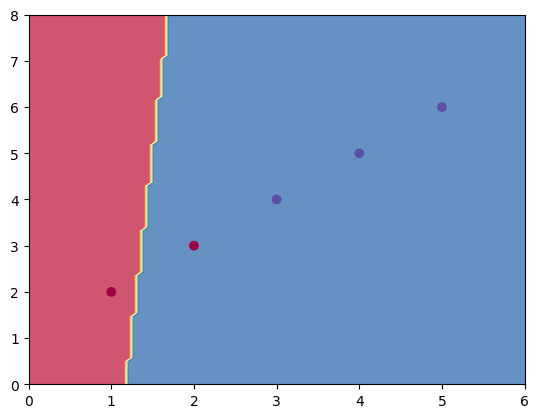

In [5]:
import matplotlib.pyplot as plt

# create 2D dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression(learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=2)

# train model on dataset
lr.fit(X, y)

# plot decision boundary
x1 = np.linspace(0, 6, 100)
x2 = np.linspace(0, 8, 100)
xx, yy = np.meshgrid(x1, x2)
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# plot data points
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

plt.show()

# Multi-Dimension Logistic Regression

In [6]:
import numpy as np
import random
n, k, p=100, 8, 3 
X=np.random.random([n,k])
W=np.random.random([k,p])

y=np.random.randint(p, size=(1,n))
Y=np.zeros((n,p))
Y[np.arange(n), y]=1

max_itr=5000
alpha=0.01
Lambda=0.01

In [7]:
# F(x)= w[0]*x + w[1]
def F(X, W):
    return np.matmul(X,W)

def H(F):
    return 1/(1+np.exp(-F))

def cost(Y_est, Y):
    E= - (1/n) * (np.sum(Y*np.log(Y_est) + (1-Y)*np.log(1-Y_est)))  + np.linalg.norm(W,2)
    return E, np.sum(np.argmax(Y_est,1)==y)/n

def gradient(Y_est, Y, X):
    return (1/n) * np.matmul(X.T, (Y_est - Y) ) + Lambda* 2* W

In [8]:
def fit(W, X, Y, alpha, max_itr):
    for i in range(max_itr):
        
        F_x=F(X,W)
        Y_est=H(F_x)
        E, c= cost(Y_est, Y)
        Wg=gradient(Y_est, Y, X)
        W=W - alpha * Wg
        if i%1000==0:
            print(E, c)
        
    return W, Y_est

In [9]:
X=np.concatenate( (X, np.ones((n,1))), axis=1 ) 
W=np.concatenate( (W, np.random.random((1,p)) ), axis=0 )

W, Y_est = fit(W, X, Y, alpha, max_itr)

8.517344796908038 0.33
4.910723800793214 0.4
4.884253895909955 0.46
4.868185220476246 0.48
4.858843958387878 0.49
